<a href="https://colab.research.google.com/github/pedrorotta/LinearRegression_ClaseGratuita/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementando un algoritmo de Regresión Lineal 

Solo algunas cosas para recordar : 

El objetivo de este algoritmo de Machine learning es obtener un modelo que resuelve mediante una hipótesis $h_θ(x)$ una predicción. 

<img src = "https://raw.githubusercontent.com/pedrorotta/LinearRegression_ClaseGratuita/main/images/Ecuacion1.png" height = 100 ></img>


Para este objetivo se tiene que llegar a hallar los parámetros theta para la cual la hipótesis $h_θ(x)$ me den la mejor predicción y que me permitan que la función de costo $J(θ)$ sea practicamente 0 

La función de costo queda descrita por la siguiente ecuación:

<img src = " https://raw.githubusercontent.com/pedrorotta/LinearRegression_ClaseGratuita/main/images/Ecuacion2.png" height = 100></img>

<p>Para ello se optimiza la función de costo o también llamada función de pérdida para cada theta, de tal forma que la optimización queda:</p>


<img src = "https://raw.githubusercontent.com/pedrorotta/LinearRegression_ClaseGratuita/main/images/Ecuacion3.png" height = 100> </img>




Primero lo implementaré sin utilizar librerías, es decir computarizando de manera directa las ecuaciones. Para este efecto usaré las librerías más básicas : Numpy, Pandas y Matplotlib

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<p>Primero vamos a generar un conjunto de pruebas, vamos a usar dos features y un target.</p> 
<p>En este ejemplo usaremos vectores aleatorios de la librería numpy.</p>
<p>También se ha generado la variable x0, que como se explica es el feature dummie y todos los valores son $1$.</p> 

el objetivo $y$ será igual a una expresion $y = x1*2 - 3*x2 +10$  

In [253]:
np.set_printoptions(precision=2)
x1 = np.random.rand(30,)
x2 = np.random.rand(30,)
x0 = np.ones(30,)
y = x1*2-3*x2+10

Para poder visualizar los datos de entrenamiento de una manera más óptima para el espectador, vamos a generar una tabla de datos

In [254]:
TablaDeDatos = pd.DataFrame(data = {'feature1': x1, 'feature2': x2, 'target': y})
TablaDeDatos.head(10)

,feature1,feature2,target
0,0.751073,0.399329,10.304159
1,0.331842,0.200202,10.063079
2,0.464915,0.670206,8.919213
3,0.243248,0.210595,9.854713
4,0.512817,0.404975,9.810708
5,0.844466,0.941697,8.863841
6,0.646794,0.108833,10.967089
7,0.315206,0.106496,10.310923
8,0.036816,0.601213,8.269993
9,0.779292,0.116427,11.209303


Para ver un diagrama de disperción de los valores que hemos generado, podemos hacer uso de matplotlib

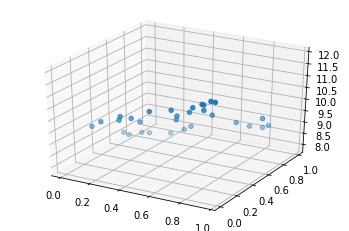

In [255]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

En la tabla extendida podemos observar que el feature dummie siempre va a ser 1 

In [256]:
TablaDeDatosExtendida = pd.DataFrame(data = {'feature dummie': x0, 'feature1': x1, 'feature2': x2, 'target': y})
TablaDeDatosExtendida.head(10)

,feature dummie,feature1,feature2,target
0,1.0,0.751073,0.399329,10.304159
1,1.0,0.331842,0.200202,10.063079
2,1.0,0.464915,0.670206,8.919213
3,1.0,0.243248,0.210595,9.854713
4,1.0,0.512817,0.404975,9.810708
5,1.0,0.844466,0.941697,8.863841
6,1.0,0.646794,0.108833,10.967089
7,1.0,0.315206,0.106496,10.310923
8,1.0,0.036816,0.601213,8.269993
9,1.0,0.779292,0.116427,11.209303


Precisemos algunas cosas : 

* Tenemos $30$ datos de entrenamiento, es decir: $m = 30$
* Tenemos 2 Features, pero existirán 3 parámetros, es decir que
$j_m = 3$ 


Es hora de empezar con el algoritmo de entrenamiento. Para ello vamos a empezar definiendo Theta de manera aleatoria

In [257]:
Theta = np.random.rand(3,)

La hipótesis seguirá una computarización como se expresa en la siguiente ecuación 

$h(x) = θ_0* x_0 + θ_1* x_1 +θ_2* x_2 $

Donde $θ_0,θ_1,θ_2$ Son los parámetros y son escalares y al mismo tiempo  $x_0,x_1,x_2$ son vectores que representan a los datos de entrenamiento y $h(x)$ es un vector con 30 elementos que representa a todas las hipótesis



In [258]:
H_x = Theta[0]*x0 + Theta[1]*x1 + Theta[2]*x2
H_x

array([1.07, 0.97, 1.08, 0.95, 1.03, 1.2 , 0.99, 0.94, 1.01, 1.01, 1.17,
       1.02, 0.97, 1.03, 1.08, 1.02, 1.03, 1.02, 1.2 , 0.99, 1.09, 1.15,
       1.13, 1.03, 0.93, 1.05, 1.01, 1.04, 1.02, 0.94])

Si computarizamos la Función de costo por medio de una función de Python tenemos que decir que es una suma de todos los errores al cuadrado dentro del vector de $h(x)$ representado en código por `H_x`

In [259]:
def FuncionDeCosto(hipotesisprima,y):
  suma = 0 
  error = (hipotesisprima - y)**2
  for i in error:
    suma = suma+i
  ErrorCuadraticoMedio = suma/2
  return ErrorCuadraticoMedio

Si computarizamos el valor de la Función de costo de esta hipótesis vemos que es muy grande, ¿a qué se debe? a que el algoritmo recién es un bebé, no ha entrenado nunca, es más los valores de θ que hemos utilizado, los hemos obtenido mediante un proceso aleatorio de numpy. 

In [260]:
FuncionDeCosto(H_x,y)

1171.4080494313944

Si queremos computarizar la hipotesis de cualquier valor de features con cualquier valor de Parámetros θ, podemos escribir la siguiente función. Te recomiendo que lo analices primero. 

Explicación : 

* SumaHipotesis es una variable que sumará cada componente $θ_j*x_j$ para cada vector $x_j$ que representa todos los datos de entrenamiento

* Luego cada `SubHipotesis` representa la multiplicación de cada $θ_j*x_j$ para cada vector $x_j$ que representa a todos los datos de entrenamiento

Como vemos la función de costo, es bastante alta debido a que no se ha entrenado aún, solo hemos calculado una hipótesis primaria con los valores aleatorios de θ

In [261]:
def hipotesis(ArrayDeFeatures, ArrayDeParametros):
  sumaHipotesis = 0
  for i in range(0,len(ArrayDeParametros)):
    SubHipotesis = ArrayDeParametros[i]*ArrayDeFeatures[i]
    sumaHipotesis = sumaHipotesis+SubHipotesis
  return sumaHipotesis
H_1 = hipotesis(np.array([x0,x1,x2]),Theta)
print(FuncionDeCosto(H_1,y))

1171.4080494313944


Para poder optimizar los valores de los parámetros $θ_j$ tenemos que hacer uso de la función de optimización : 

<img src = "https://raw.githubusercontent.com/pedrorotta/LinearRegression_ClaseGratuita/main/images/Ecuacion3.png"></img>

Esta imagen muestra que el valor inicial de $θ_j$ se debe restar por la multiplicación del **learning rate** con una **sumatoria de errores simple** que será equivalente a : 

$Σ^m_i(h(x^i)-y^i)x^i_j$

Para computarizar esta ecuación, podemos recurrir a definir una función SumaDeErroresSimples. 

Explicación de la función: 

* `x`  : Features ($x_j$)

* `Hipotesis`  : Hipótesis

* `y` : Target

* `Theta` : Parámetros Theta

* `lista_xj` : Una lista con los features $x_j$ incluyendo $x_0$. Es una lista con 3 elementos

* `errorsimple` : Representa la diferencia entre los vectores de Hipóteisis y el vector de target. Es un vector con 30 elementos

* `errorXj` : Representa un vector , donde los elementos son cada uno de los resultados al multiplicar $(h(x^i)-y^i)x^i_j$. Es un vector con 30 elementos. 

* `ListaErrorXj` : Una lista con todos los vectores `errorXj` que luego se van a sumar por cada $θ_j$. Es una lista con 3 vectores de 30 elementos cada uno. 

* `sumaerror` : Es una variable que va a ser usada para sumar cada error particular de cada `errorXj` y que devolverá el resultado de cuanto es el valor que se debe multiplicar al learning rate por cada $θ_j$

* `ListaSumaErroresXj` : Es una lista con los valores que se van a usar para la optimización, representa un vector de 3 elementos en este caso ya que hay 3 parámetros θ

* `ArraySumaErroresXj` : Es la variable `ListaSumaErroresXj` pero transformada a vector. 

In [270]:

def SumaDeErroresSimples(x, Hipotesis, y, Theta):
  lista_xj = x
  errorsimple = (Hipotesis-y)
  errorXj = 0
  ListaErrorXj = []
  sumaerror = 0
  ListaSumaErroresXj = []
  errorsimple = (Hipotesis-y)
  for i in range(0,len(Theta)):
      errorXj = errorsimple*lista_xj[i]
      ListaErrorXj.append(errorXj)
  
  for error in ListaErrorXj:
    for x in error: 
      sumaerror = sumaerror + x
    ListaSumaErroresXj.append(sumaerror)
    sumaerror = 0
  ArraySumaErroresXj = np.array(ListaSumaErroresXj)
  return ArraySumaErroresXj

Con estas 3 funciones vamos a definir la función **LinearRegression** que entrenará a los valores durante varias iteraciones hasta converger. 

Una manera de que veas el resultado es correr esta función y probar un poco sus resultados. 

* `iter`  : Iteraciones

* `x`  : Lista de features

* `Hipotesis`  : Hipótesis

* `y` : Target

* `Theta` : Parámetros Theta

* `umbral` : Valor de costo óptimo. Por defecto 0 

* `learning_rate` : Valor por defecto = $0.001$

* `ArrayDeParametros` : Parámetros $θ_j$ que es lo que queremos obtener. 

* `funcionDeCosto` : Función de costo al final de las iteraciones

* `Historia` : Lista con todas las Funciones de costo en cada iteración


In [277]:
def LinearRegression(iter, x , y , theta = [], umbral = 0, learning_rate = 0.001):
  ListaDeFeatures = x
  Target = y
  ParametrosIniciales = theta
  ArrayDeFeatures = np.array(ListaDeFeatures)
  TargetArray = np.array(Target)
  ArrayDeParametros = np.array(ParametrosIniciales)
  Historia = []
  for i in range(0,iter):
    Hipotesis = hipotesis(ArrayDeFeatures, ArrayDeParametros)
    HipotesisValidacion = hipotesis
    funcionDeCosto = FuncionDeCosto(Hipotesis,TargetArray)
    Historia.append(funcionDeCosto)
    if funcionDeCosto <= umbral:
      return ArrayDeParametros, funcionDeCosto, Historia 
    else:
      sumaDeerroresSimples = SumaDeErroresSimples(ArrayDeFeatures, Hipotesis, TargetArray, ArrayDeParametros)
      ArrayDeParametros = ArrayDeParametros - learning_rate*sumaDeerroresSimples
  return ArrayDeParametros, funcionDeCosto, Historia

Entrenamiento: Si cambias el número de iteraciones en el modelo vas a poder ver la diferencia entre elegir un número de elementos bajos o altos. 

Si ves nuestra función elegida era : 

$y = x1*2 - 3*x2 +10$

Al momento de iterar 100 veces nuestro modelo, obtenemos: 

* $θ_0 = 7.1$
* $θ_1 = 3.43$
* $θ_2 = 1.57$

Por lo que los valores están cercanos, pero no son iguales

También podemos ver que la función de costo es un poco alta ya que no está cercana a $0$. 


In [286]:
iter = 100
modelo =  LinearRegression(iter, [x0,x1,x2] , y , theta = Theta , umbral = 0.0000001, learning_rate = 0.001)
parametros = modelo[0]
funciondecosto = modelo[1]
historiadecosto = modelo[2]
print(parametros)
print(f'la función de costo es {np.round(funciondecosto,2)}')

[7.1  3.43 1.57]
la función de costo es 29.83


Si ahora probamos con 1000 iteraciones

* $θ_0 = 9.3$
* $θ_1 = 2.65$
* $θ_2 = -2.23$

Los valores mejoran y la función de costo o función de pérdida baja también

In [287]:
iter = 1000
modelo =  LinearRegression(iter, [x0,x1,x2] , y , theta = Theta , umbral = 0.0000001, learning_rate = 0.001)
parametros = modelo[0]
funciondecosto = modelo[1]
historiadecosto = modelo[2]
print(parametros)
print(f'la función de costo es {np.round(funciondecosto,2)}')

[ 9.3   2.65 -2.23]
la función de costo es 1.2


El segundo modelo con 1000 iteraciones mejora bastante, podemos ver en una gráfica como varía la función de costo cuando aumentamos las iteraciones


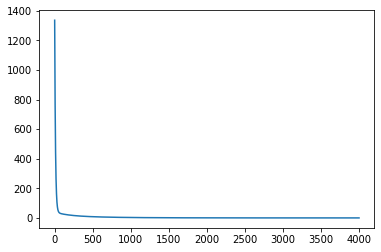

In [288]:
x_historia = np.arange(0,len(historia),1)
y_historia = historia
plt.plot(x_historia, y_historia)
plt.show()

Ahora te toca a ti, cambia el número de iteraciones y comprueba los resultados

[ 9.3   2.65 -2.23]
la función de costo es 1.2


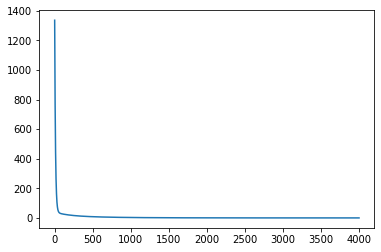

In [291]:
iter = 1000
modelo =  LinearRegression(iter, [x0,x1,x2] , y , theta = Theta , umbral = 0.0000001, learning_rate = 0.001)
parametros = modelo[0]
funciondecosto = modelo[1]
historiadecosto = modelo[2]
print(parametros)
print(f'la función de costo es {np.round(funciondecosto,2)}')

x_historia = np.arange(0,len(historia),1)
y_historia = historia
plt.plot(x_historia, y_historia)
plt.show()

Validación : Vamos a ver que tan bueno es nuestro modelo prediciendo datos que nunca ha visto. Vemos que al hayar la función de costo con un dato de x1 y x2 que nunca ha visto el modelo va bastante bien. 

para este dato de validación la hipotesis es [ 9.78  9.42  9.01  8.89  9.15  9.12  9.41  7.88 10.02 10.63], el valor real es [ 9.22  9.16  9.53  8.92  9.52  9.62  9.56  7.9   9.53 10.38] y el error obtenido es 0.68504


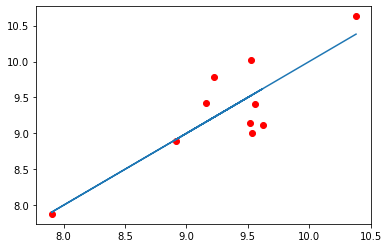

In [309]:
parametrosDelModelo = parametros
x1_validation = np.random.rand(10,)
x2_validation = np.random.rand(10,)
x0 = np.ones(10,)
x_validacion = np.array([x0,x1_validation,x2_validation])
y_validacion = 10 + 2*x1_validation - 3*x2_validation
hipotesis_validacion = hipotesis(x_validacion, parametrosDelModelo)
funciondecosto_validacion = FuncionDeCosto(hipotesis_validacion, y_validacion)

plt.scatter(y_validacion, hipotesis_validacion, c = 'red')
plt.plot(y_validacion, y_validacion)

print(f'para este dato de validación la hipotesis es {hipotesis_validacion}, el valor real es {y_validacion} y el error obtenido es {np.round(funciondecosto_validacion,5)}')

Otra forma de medir que tan bueno es nuestro modelo es mediante el $R^2$ o también llamado precisión del modelo. que para una regresión lineal se puede hallar como sigue

In [317]:
def R2(y_verdadero, hipotesis):
  y_verdadero = np.array(y_verdadero)
  hipotesis = np.array(hipotesis)
  corr = np.corrcoef(y_verdadero, hipotesis)
  r2 = corr[0,1] ** 2
  return r2

r2_1 = R2(y_validacion, hipotesis_validacion)
-print(f'La precisión del modelo para los datos de validación es de {np.round(r2_1,2)}')

La precisión del modelo para los datos de validación es de 0.72
